In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


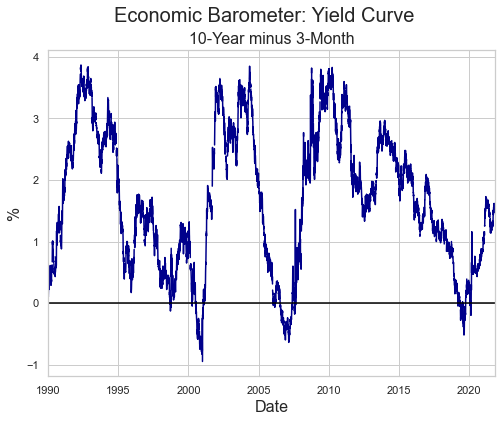

In [2]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Yield Curve', fontsize=20)
plt.title('10-Year minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

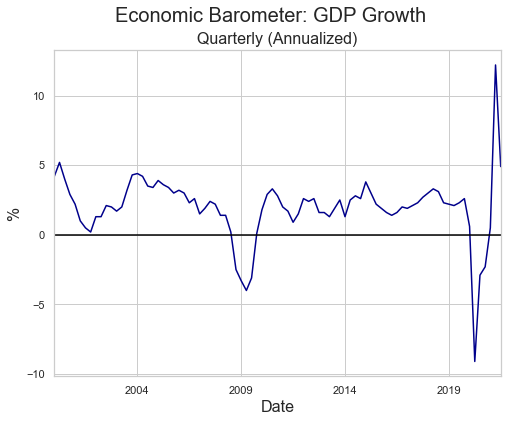

In [3]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: GDP Growth', fontsize=20)
plt.title('Quarterly (Annualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, 'Tillions $')

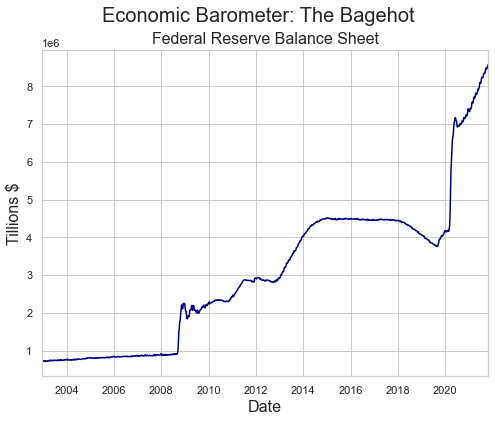

In [4]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: The Bagehot', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tillions $', fontsize=16)


Text(0, 0.5, '')

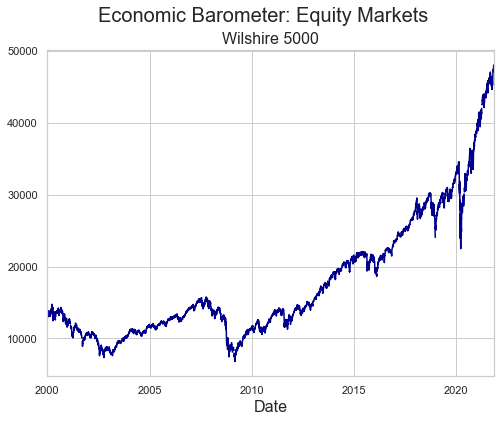

In [5]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Equity Markets', fontsize=20)
plt.title('Wilshire 5000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)


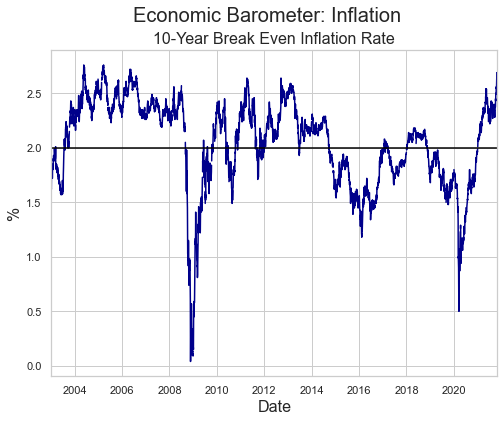

In [6]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Inflation', fontsize=20)
plt.title('10-Year Break Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")

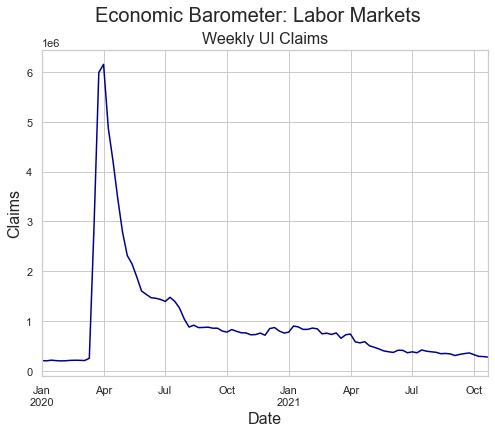

In [7]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Labor Markets', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

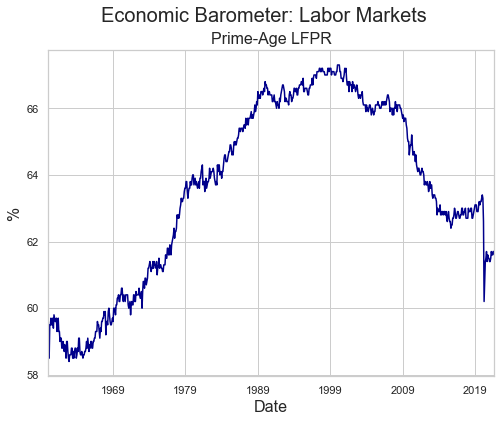

In [8]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Labor Markets', fontsize=20)
plt.title('Prime-Age LFPR', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)


In [13]:
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (210000000 - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (210000000 - vaccination['people_fully_vaccinated']) / 210000000 * 100
vaccination['rate'] = vaccination['daily_vaccinations'] / vaccination['people_outstanding'] * 100

Text(0, 0.5, 'Hundreds of Millions')

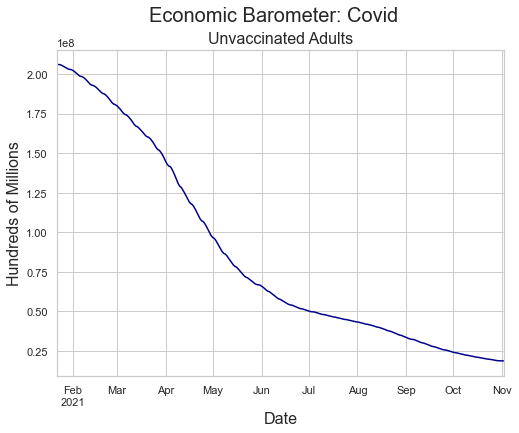

In [14]:
vaccination['people_outstanding'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Covid', fontsize=20)
plt.title('Unvaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Hundreds of Millions', fontsize=16)



Text(0, 0.5, '%')

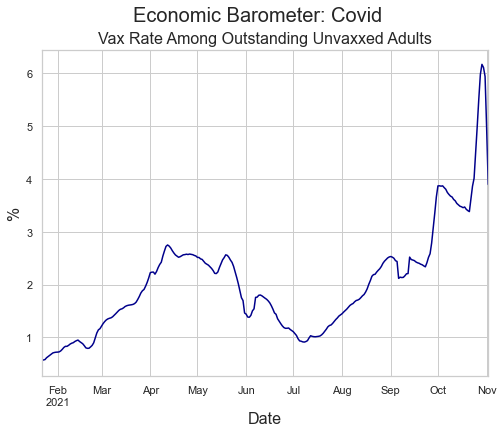

In [15]:
vaccination['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Covid', fontsize=20)
plt.title('Vax Rate Among Outstanding Unvaxxed Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, 'Millions')

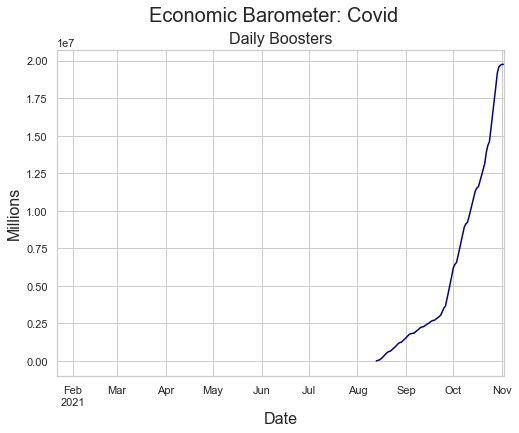

In [16]:
vaccination['total_boosters'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer: Covid', fontsize=20)
plt.title('Daily Boosters', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions', fontsize=16)

